In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
image_dir = Path('/Users/geek/Downloads/geek/heart/0')

In [3]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: '0', filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

zerosimage_df = pd.concat([filepaths, labels], axis=1)

In [4]:
image_dir2 = Path('/Users/geek/Downloads/geek/heart/1')
filepaths2 = list(image_dir2.glob(r'**/*.png'))
labels2 = list(map(lambda x: '1', filepaths2))

filepaths2 = pd.Series(filepaths2, name='Filepath').astype(str)
labels2 = pd.Series(labels2, name='Label')

onesimage_df = pd.concat([filepaths2, labels2], axis=1)

In [5]:
zerosimage_df

,Filepath,Label
0,/Users/geek/Downloads/geek/heart/0/613_2.png,0
1,/Users/geek/Downloads/geek/heart/0/1210_8.png,0
2,/Users/geek/Downloads/geek/heart/0/512_2.png,0
3,/Users/geek/Downloads/geek/heart/0/818_2.png,0
4,/Users/geek/Downloads/geek/heart/0/1120_5.png,0
...,...,...
387,/Users/geek/Downloads/geek/heart/0/912_1.png,0
388,/Users/geek/Downloads/geek/heart/0/1212_7.png,0
389,/Users/geek/Downloads/geek/heart/0/1210_5.png,0
390,/Users/geek/Downloads/geek/heart/0/1312_2.png,0


In [6]:
onesimage_df

,Filepath,Label
0,/Users/geek/Downloads/geek/heart/1/118_1.png,1
1,/Users/geek/Downloads/geek/heart/1/613_2.png,1
2,/Users/geek/Downloads/geek/heart/1/2812_6.png,1
3,/Users/geek/Downloads/geek/heart/1/1210_8.png,1
4,/Users/geek/Downloads/geek/heart/1/29_2.png,1
...,...,...
948,/Users/geek/Downloads/geek/heart/1/378_8.png,1
949,/Users/geek/Downloads/geek/heart/1/910_3.png,1
950,/Users/geek/Downloads/geek/heart/1/1210_5.png,1
951,/Users/geek/Downloads/geek/heart/1/711_8.png,1


In [7]:
image_df1 = [zerosimage_df,onesimage_df]
image_df = pd.concat(image_df1)


In [8]:
image_df

,Filepath,Label
0,/Users/geek/Downloads/geek/heart/0/613_2.png,0
1,/Users/geek/Downloads/geek/heart/0/1210_8.png,0
2,/Users/geek/Downloads/geek/heart/0/512_2.png,0
3,/Users/geek/Downloads/geek/heart/0/818_2.png,0
4,/Users/geek/Downloads/geek/heart/0/1120_5.png,0
...,...,...
948,/Users/geek/Downloads/geek/heart/1/378_8.png,1
949,/Users/geek/Downloads/geek/heart/1/910_3.png,1
950,/Users/geek/Downloads/geek/heart/1/1210_5.png,1
951,/Users/geek/Downloads/geek/heart/1/711_8.png,1


In [9]:
train_df,test_df = train_test_split(image_df,train_size=0.7, shuffle = True , random_state=1)

In [10]:
train_df

,Filepath,Label
666,/Users/geek/Downloads/geek/heart/1/3517_6.png,1
323,/Users/geek/Downloads/geek/heart/0/1015_2.png,0
543,/Users/geek/Downloads/geek/heart/1/329_2.png,1
134,/Users/geek/Downloads/geek/heart/0/1121_1.png,0
262,/Users/geek/Downloads/geek/heart/1/614_7.png,1
...,...,...
323,/Users/geek/Downloads/geek/heart/1/3210_7.png,1
513,/Users/geek/Downloads/geek/heart/1/1110_2.png,1
704,/Users/geek/Downloads/geek/heart/1/811_5.png,1
235,/Users/geek/Downloads/geek/heart/0/1211_4.png,0


In [11]:
test_df


,Filepath,Label
510,/Users/geek/Downloads/geek/heart/1/1211_2.png,1
267,/Users/geek/Downloads/geek/heart/0/1311_3.png,0
111,/Users/geek/Downloads/geek/heart/0/1121_5.png,0
746,/Users/geek/Downloads/geek/heart/1/1813_1.png,1
315,/Users/geek/Downloads/geek/heart/0/1314_3.png,0
...,...,...
614,/Users/geek/Downloads/geek/heart/1/1311_1.png,1
347,/Users/geek/Downloads/geek/heart/0/1015_6.png,0
268,/Users/geek/Downloads/geek/heart/1/158_6.png,1
269,/Users/geek/Downloads/geek/heart/1/1713_4.png,1


In [12]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
    
)

In [13]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 753 validated image filenames belonging to 2 classes.
Found 188 validated image filenames belonging to 2 classes.
Found 404 validated image filenames belonging to 2 classes.


In [14]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=120,
    #callbacks=[
     #   tf.keras.callbacks.EarlyStopping(
      #      monitor='val_loss',
       #     patience=5,
        #    restore_best_weights=True
       # ),
       # tf.keras.callbacks.ReduceLROnPlateau(
        #    monitor='val_loss',
         #   patience=3
       # )
    #]
)

Metal device set to: Apple M1


2022-12-28 14:09:21.126314: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-28 14:09:21.126503: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/120


2022-12-28 14:09:21.487562: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-28 14:09:21.642537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - ETA: 0s - loss: 0.6433 - accuracy: 0.7198

2022-12-28 14:09:26.812938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


24/24 [==============================] - 6s 255ms/step - loss: 0.6433 - accuracy: 0.7198 - val_loss: 0.6492 - val_accuracy: 0.6915
Epoch 2/120
24/24 [==============================] - 6s 246ms/step - loss: 0.6242 - accuracy: 0.7198 - val_loss: 0.6300 - val_accuracy: 0.6915
Epoch 3/120
24/24 [==============================] - 6s 236ms/step - loss: 0.6018 - accuracy: 0.7198 - val_loss: 0.6125 - val_accuracy: 0.6915
Epoch 4/120
24/24 [==============================] - 6s 230ms/step - loss: 0.5831 - accuracy: 0.7198 - val_loss: 0.6032 - val_accuracy: 0.6915
Epoch 5/120
24/24 [==============================] - 6s 230ms/step - loss: 0.5667 - accuracy: 0.7198 - val_loss: 0.5829 - val_accuracy: 0.6915
Epoch 6/120
24/24 [==============================] - 6s 238ms/step - loss: 0.5408 - accuracy: 0.7198 - val_loss: 0.5521 - val_accuracy: 0.6968
Epoch 7/120
24/24 [==============================] - 6s 244ms/step - loss: 0.4811 - accuracy: 0.7477 - val_loss: 0.4812 - val_accuracy: 0.7500
Epoch 8/120

24/24 [==============================] - 5s 222ms/step - loss: 0.3479 - accuracy: 0.8367 - val_loss: 0.4209 - val_accuracy: 0.8032
Epoch 59/120
24/24 [==============================] - 5s 223ms/step - loss: 0.3704 - accuracy: 0.8127 - val_loss: 0.3973 - val_accuracy: 0.7979
Epoch 60/120
24/24 [==============================] - 5s 222ms/step - loss: 0.3535 - accuracy: 0.8406 - val_loss: 0.4030 - val_accuracy: 0.8191
Epoch 61/120
24/24 [==============================] - 5s 223ms/step - loss: 0.3920 - accuracy: 0.8088 - val_loss: 0.4418 - val_accuracy: 0.7606
Epoch 62/120
24/24 [==============================] - 5s 221ms/step - loss: 0.3636 - accuracy: 0.8274 - val_loss: 0.3732 - val_accuracy: 0.8085
Epoch 63/120
24/24 [==============================] - 5s 223ms/step - loss: 0.3721 - accuracy: 0.8061 - val_loss: 0.4131 - val_accuracy: 0.8032
Epoch 64/120
24/24 [==============================] - 5s 222ms/step - loss: 0.3576 - accuracy: 0.8141 - val_loss: 0.3643 - val_accuracy: 0.8351
Epoch

Epoch 115/120
24/24 [==============================] - 5s 223ms/step - loss: 0.3152 - accuracy: 0.8380 - val_loss: 0.3748 - val_accuracy: 0.8351
Epoch 116/120
24/24 [==============================] - 6s 229ms/step - loss: 0.3257 - accuracy: 0.8619 - val_loss: 0.3344 - val_accuracy: 0.8670
Epoch 117/120
24/24 [==============================] - 6s 234ms/step - loss: 0.3058 - accuracy: 0.8606 - val_loss: 0.3423 - val_accuracy: 0.8404
Epoch 118/120
24/24 [==============================] - 5s 222ms/step - loss: 0.3062 - accuracy: 0.8566 - val_loss: 0.3667 - val_accuracy: 0.8564
Epoch 119/120
24/24 [==============================] - 5s 224ms/step - loss: 0.3083 - accuracy: 0.8526 - val_loss: 0.3077 - val_accuracy: 0.8670
Epoch 120/120
24/24 [==============================] - 5s 223ms/step - loss: 0.3108 - accuracy: 0.8645 - val_loss: 0.3949 - val_accuracy: 0.7872


In [15]:
results = model.evaluate(test_images, verbose = 0)
print("  test loss: {:.5f}".format(results[0]))
print("test accuracy: {:.2f}%".format(results[1]*100))

  test loss: 0.30493
test accuracy: 84.65%


 4/13 [========>.....................] - ETA: 0s

2022-12-28 14:20:15.689792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 0s 31ms/step


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/2390734351.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = (model.predict(test_images) >= 0.5).astype(np.int)


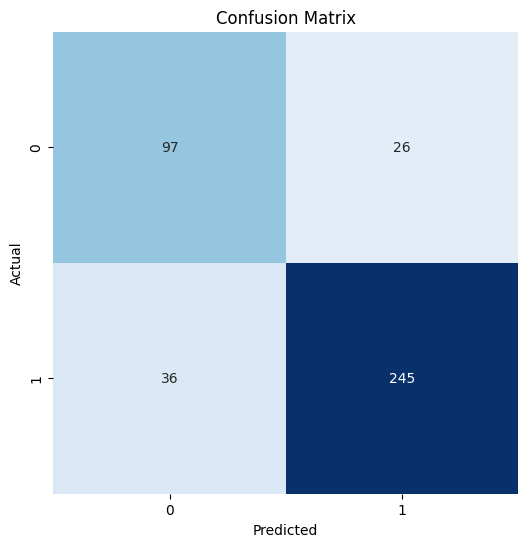

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.73      0.79      0.76       123
           1       0.90      0.87      0.89       281

    accuracy                           0.85       404
   macro avg       0.82      0.83      0.82       404
weighted avg       0.85      0.85      0.85       404



In [16]:
predictions = (model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["0", "1"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.yticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [17]:
image_dir = Path('/Users/geek/Downloads/geek/liver/00')

In [18]:
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: '0', filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

zerosimage_df = pd.concat([filepaths, labels], axis=1)

In [19]:
image_dir2 = Path('/Users/geek/Downloads/geek/liver/11')
filepaths2 = list(image_dir2.glob(r'**/*.png'))
labels2 = list(map(lambda x: '1', filepaths2))

filepaths2 = pd.Series(filepaths2, name='Filepath').astype(str)
labels2 = pd.Series(labels2, name='Label')

onesimage_df = pd.concat([filepaths2, labels2], axis=1)

In [20]:
zerosimage_df["Filepath"][0]

'/Users/geek/Downloads/geek/liver/00/_png/20161012_185527_MR_/8_1.png'

In [21]:
onesimage_df

,Filepath,Label
0,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
2,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
3,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
4,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
...,...,...
1339,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1340,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1341,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1342,/Users/geek/Downloads/geek/liver/11/_png/20160...,1


In [22]:
image_df1 = [zerosimage_df,onesimage_df]
image_df = pd.concat(image_df1)


In [23]:
image_df

,Filepath,Label
0,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
1,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
2,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
3,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
4,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
...,...,...
1339,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1340,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1341,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1342,/Users/geek/Downloads/geek/liver/11/_png/20160...,1


In [24]:
train_df,test_df = train_test_split(image_df,train_size=0.7, shuffle = True , random_state=1)

In [25]:
train_df

,Filepath,Label
988,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
426,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
810,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
968,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
1074,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
...,...,...
283,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
473,/Users/geek/Downloads/geek/liver/11/_png/20170...,1
664,/Users/geek/Downloads/geek/liver/11/_png/20161...,1
235,/Users/geek/Downloads/geek/liver/00/_png/20161...,0


In [26]:
test_df


,Filepath,Label
720,/Users/geek/Downloads/geek/liver/11/_png/20161...,1
1254,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
302,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
108,/Users/geek/Downloads/geek/liver/00/_png/20161...,0
1185,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
...,...,...
992,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
709,/Users/geek/Downloads/geek/liver/11/_png/20161...,1
105,/Users/geek/Downloads/geek/liver/11/_png/20160...,1
314,/Users/geek/Downloads/geek/liver/00/_png/20161...,0


# load data

In [27]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
    
)

In [28]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

Found 995 validated image filenames belonging to 2 classes.
Found 248 validated image filenames belonging to 2 classes.
Found 533 validated image filenames belonging to 2 classes.


# training

In [29]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=inputs, outputs=outputs)

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    train_images,
    validation_data=val_images,
    epochs=120,
    #callbacks=[
     #   tf.keras.callbacks.EarlyStopping(
      #      monitor='val_loss',
       #     patience=5,
        #    restore_best_weights=True
       # ),
       # tf.keras.callbacks.ReduceLROnPlateau(
        #    monitor='val_loss',
         #   patience=3
       # )
    #]
)

Epoch 1/120


2022-12-28 14:20:16.761663: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.7578

2022-12-28 14:20:22.399142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 7s 213ms/step - loss: 0.6173 - accuracy: 0.7578 - val_loss: 0.6016 - val_accuracy: 0.7500
Epoch 2/120
32/32 [==============================] - 7s 209ms/step - loss: 0.5721 - accuracy: 0.7578 - val_loss: 0.5676 - val_accuracy: 0.7500
Epoch 3/120
32/32 [==============================] - 7s 206ms/step - loss: 0.5486 - accuracy: 0.7578 - val_loss: 0.5468 - val_accuracy: 0.7500
Epoch 4/120
32/32 [==============================] - 7s 205ms/step - loss: 0.5317 - accuracy: 0.7578 - val_loss: 0.5362 - val_accuracy: 0.7500
Epoch 5/120
32/32 [==============================] - 7s 205ms/step - loss: 0.5185 - accuracy: 0.7578 - val_loss: 0.5283 - val_accuracy: 0.7500
Epoch 6/120
32/32 [==============================] - 7s 204ms/step - loss: 0.4923 - accuracy: 0.7578 - val_loss: 0.4837 - val_accuracy: 0.7540
Epoch 7/120
32/32 [==============================] - 7s 204ms/step - loss: 0.4444 - accuracy: 0.7809 - val_loss: 0.4209 - val_accuracy: 0.7903
Epoch 8/120

32/32 [==============================] - 7s 204ms/step - loss: 0.2859 - accuracy: 0.8503 - val_loss: 0.2919 - val_accuracy: 0.8589
Epoch 59/120
32/32 [==============================] - 6s 202ms/step - loss: 0.2829 - accuracy: 0.8633 - val_loss: 0.2794 - val_accuracy: 0.8710
Epoch 60/120
32/32 [==============================] - 7s 203ms/step - loss: 0.2841 - accuracy: 0.8643 - val_loss: 0.2818 - val_accuracy: 0.8790
Epoch 61/120
32/32 [==============================] - 7s 207ms/step - loss: 0.3083 - accuracy: 0.8402 - val_loss: 0.2835 - val_accuracy: 0.8629
Epoch 62/120
32/32 [==============================] - 7s 203ms/step - loss: 0.2762 - accuracy: 0.8583 - val_loss: 0.2869 - val_accuracy: 0.8669
Epoch 63/120
32/32 [==============================] - 7s 202ms/step - loss: 0.2673 - accuracy: 0.8673 - val_loss: 0.2738 - val_accuracy: 0.8750
Epoch 64/120
32/32 [==============================] - 6s 201ms/step - loss: 0.2675 - accuracy: 0.8683 - val_loss: 0.2708 - val_accuracy: 0.8629
Epoch

Epoch 115/120
32/32 [==============================] - 6s 202ms/step - loss: 0.2006 - accuracy: 0.9075 - val_loss: 0.1979 - val_accuracy: 0.9073
Epoch 116/120
32/32 [==============================] - 7s 203ms/step - loss: 0.1912 - accuracy: 0.9176 - val_loss: 0.2226 - val_accuracy: 0.8952
Epoch 117/120
32/32 [==============================] - 7s 204ms/step - loss: 0.1859 - accuracy: 0.9095 - val_loss: 0.2130 - val_accuracy: 0.8710
Epoch 118/120
32/32 [==============================] - 7s 203ms/step - loss: 0.1668 - accuracy: 0.9327 - val_loss: 0.1986 - val_accuracy: 0.8992
Epoch 119/120
32/32 [==============================] - 7s 203ms/step - loss: 0.1689 - accuracy: 0.9276 - val_loss: 0.2105 - val_accuracy: 0.8992
Epoch 120/120
32/32 [==============================] - 7s 203ms/step - loss: 0.1863 - accuracy: 0.9116 - val_loss: 0.2092 - val_accuracy: 0.9153


In [30]:
results = model2.evaluate(test_images, verbose = 0)
print("  test loss: {:.5f}".format(results[0]))
print("test accuracy: {:.2f}%".format(results[1]*100))

  test loss: 0.19306
test accuracy: 91.37%


 7/17 [===========>..................] - ETA: 0s

2022-12-28 14:33:29.049373: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


17/17 [==============================] - 0s 24ms/step


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/2796210669.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  predictions = (model2.predict(test_images) >= 0.5).astype(np.int)


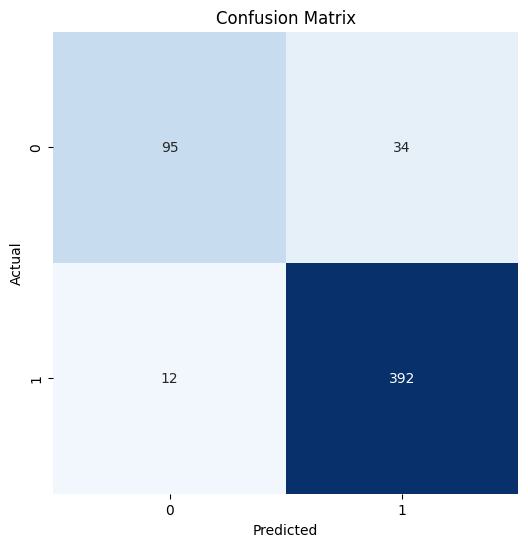

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.89      0.74      0.81       129
           1       0.92      0.97      0.94       404

    accuracy                           0.91       533
   macro avg       0.90      0.85      0.87       533
weighted avg       0.91      0.91      0.91       533



In [31]:
predictions = (model2.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["0", "1"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.yticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [32]:
image_dir = Path('/Users/geek/Downloads/img0')
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: '0', filepaths))

filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

zerosimage_df = pd.concat([filepaths, labels], axis=1)

In [33]:
image_dir2 = Path('/Users/geek/Downloads/img1')
filepaths2 = list(image_dir2.glob(r'**/*.png'))
labels2 = list(map(lambda x: '1', filepaths2))

filepaths2 = pd.Series(filepaths2, name='Filepath').astype(str)
labels2 = pd.Series(labels2, name='Label')

onesimage_df = pd.concat([filepaths2, labels2], axis=1)

In [34]:
image_df1 = [zerosimage_df,onesimage_df]
image_df = pd.concat(image_df1)
image_df

,Filepath,Label
0,/Users/geek/Downloads/img0/0/613_2.png,0
1,/Users/geek/Downloads/img0/0/1210_8.png,0
2,/Users/geek/Downloads/img0/0/512_2.png,0
3,/Users/geek/Downloads/img0/0/818_2.png,0
4,/Users/geek/Downloads/img0/0/1120_5.png,0
...,...,...
2292,/Users/geek/Downloads/img1/1/378_8.png,1
2293,/Users/geek/Downloads/img1/1/910_3.png,1
2294,/Users/geek/Downloads/img1/1/1210_5.png,1
2295,/Users/geek/Downloads/img1/1/711_8.png,1


In [ ]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
models = [model, model2]
model_input = Input(shape=(224, 224, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [ ]:
ensemble_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
train_df,test_df = train_test_split(image_df,train_size=0.7, shuffle = True , random_state=1)

In [ ]:
train_df

In [ ]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip=True,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
    
)

In [ ]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Label',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
    shuffle=False
)

In [ ]:
history=ensemble_model.fit(
    train_images,
    validation_data=val_images,
    epochs=120,
)

In [ ]:
results = ensemble_model.evaluate(test_images, verbose = 0)
print("  test loss: {:.5f}".format(results[0]))
print("test accuracy: {:.2f}%".format(results[1]*100))

In [ ]:
predictions = (ensemble_model.predict(test_images) >= 0.5).astype(np.int)

cm = confusion_matrix(test_images.labels, predictions, labels=[0, 1])
clr = classification_report(test_images.labels, predictions, labels=[0, 1], target_names=["0", "1"])

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.yticks(ticks=[0.5, 1.5], labels=["0", "1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [47]:
import pandas as pd
import numpy as np
import os.path
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from PIL import Image

%matplotlib inline
from tensorflow import keras 
from tensorflow.keras.applications import ResNet50,ResNet101
import cv2
from tqdm import tqdm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import backend as K
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average

In [36]:
from sklearn.model_selection import StratifiedKFold , KFold ,RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [37]:
image_df

,Filepath,Label
0,/Users/geek/Downloads/img0/0/613_2.png,0
1,/Users/geek/Downloads/img0/0/1210_8.png,0
2,/Users/geek/Downloads/img0/0/512_2.png,0
3,/Users/geek/Downloads/img0/0/818_2.png,0
4,/Users/geek/Downloads/img0/0/1120_5.png,0
...,...,...
2292,/Users/geek/Downloads/img1/1/378_8.png,1
2293,/Users/geek/Downloads/img1/1/910_3.png,1
2294,/Users/geek/Downloads/img1/1/1210_5.png,1
2295,/Users/geek/Downloads/img1/1/711_8.png,1


In [50]:
main_pred = []
error = []
data_kfold = pd.DataFrame()

In [51]:
acc_per_fold=[]
loss_per_fold=[]
models=[]

In [52]:
train_y = image_df.Label
train_x = image_df.drop(['Label'],axis=1)

In [53]:
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 100
N_SPLIT = 7

In [54]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
kfold = StratifiedKFold(n_splits=N_SPLIT,shuffle=True,random_state=42)

In [56]:
# Variable for keeping count of split we are executing
j = 0

In [57]:
def get_model():
    models = [model, model2]
    model_input = Input(shape=(224, 224, 3))
    model_outputs = [model(model_input) for model in models]
    ensemble_output = Average()(model_outputs)
    ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

    ensemble_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

    return model
#     model.summary()

In [58]:
# K-fold Train and test for each split
for train_idx, val_idx in list(kfold.split(train_x,train_y)):
    x_train_df = image_df.iloc[train_idx]
    x_valid_df = image_df.iloc[val_idx]
    j+=1


    training_set = train_datagen.flow_from_dataframe(dataframe=x_train_df, 
                                                 x_col="Filepath", y_col="Label",
                                                 class_mode="binary",
                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=32)
    
    validation_set = validation_datagen.flow_from_dataframe(dataframe=x_valid_df,
                                                 x_col="Filepath", y_col="Label",
                                                 class_mode="binary",
                                                 target_size=(IMG_SIZE,IMG_SIZE), batch_size=32)
    
    model_test = get_model()
    
    
    history = model_test.fit_generator( training_set,
                                        validation_data=validation_set,
                                        epochs = EPOCHS,
                                        steps_per_epoch=x_train_df.shape[0] // BATCH_SIZE
                                        )
    
    test_generator = ImageDataGenerator(rescale = 1./255)
    
    test_set = test_generator.flow_from_dataframe(dataframe=image_df,
                                                 x_col="Filepath",y_col=None,
                                                 class_mode=None,
                                                 target_size=(IMG_SIZE,IMG_SIZE))
    
    pred= model_test.predict_generator(test_set, len(image_df) // 32)
    predicted_class_indices=np.argmax(pred,axis=1)
                                       
    data_kfold[j] = predicted_class_indices
    gc.collect()
      # Generate generalization metrics
    scores = model_test.evaluate(test_images, verbose = 0)
    print(f'Score for fold {j}: {model_test.metrics_names[0]} of {scores[0]}; {model_test.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])
    models.append(model_test)

Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


Epoch 1/100
83/83 [==============================] - 15s 173ms/step - loss: 0.3650 - accuracy: 0.8199 - val_loss: 0.3632 - val_accuracy: 0.8363
Epoch 2/100
83/83 [==============================] - 15s 175ms/step - loss: 0.3690 - accuracy: 0.8135 - val_loss: 0.3402 - val_accuracy: 0.8341
Epoch 3/100
83/83 [==============================] - 15s 174ms/step - loss: 0.3576 - accuracy: 0.8161 - val_loss: 0.3287 - val_accuracy: 0.8453
Epoch 4/100
83/83 [==============================] - 15s 175ms/step - loss: 0.3591 - accuracy: 0.8180 - val_loss: 0.3339 - val_accuracy: 0.8430
Epoch 5/100
83/83 [==============================] - 15s 174ms/step - loss: 0.3632 - accuracy: 0.8207 - val_loss: 0.3228 - val_accuracy: 0.8565
Epoch 6/100
83/83 [==============================] - 15s 176ms/step - loss: 0.3421 - accuracy: 0.8328 - val_loss: 0.3240 - val_accuracy: 0.8341
Epoch 7/100
83/83 [==============================] - 15s 175ms/step - loss: 0.3489 - accuracy: 0.8252 - val_loss: 0.3336 - val_accuracy:

83/83 [==============================] - 15s 174ms/step - loss: 0.2149 - accuracy: 0.9088 - val_loss: 0.1916 - val_accuracy: 0.9395
Epoch 58/100
83/83 [==============================] - 15s 176ms/step - loss: 0.2197 - accuracy: 0.9069 - val_loss: 0.2023 - val_accuracy: 0.9283
Epoch 59/100
83/83 [==============================] - 15s 174ms/step - loss: 0.2040 - accuracy: 0.9160 - val_loss: 0.1936 - val_accuracy: 0.9283
Epoch 60/100
83/83 [==============================] - 15s 175ms/step - loss: 0.1930 - accuracy: 0.9149 - val_loss: 0.1790 - val_accuracy: 0.9327
Epoch 61/100
83/83 [==============================] - 15s 174ms/step - loss: 0.1895 - accuracy: 0.9209 - val_loss: 0.2045 - val_accuracy: 0.9260
Epoch 62/100
83/83 [==============================] - 15s 174ms/step - loss: 0.1964 - accuracy: 0.9198 - val_loss: 0.1688 - val_accuracy: 0.9260
Epoch 63/100
83/83 [==============================] - 15s 174ms/step - loss: 0.2039 - accuracy: 0.9084 - val_loss: 0.2128 - val_accuracy: 0.912

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)
2022-12-28 15:04:09.361682: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Score for fold 1: loss of 0.1552063226699829; accuracy of 93.24578046798706%
Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 178ms/step - loss: 0.1727 - accuracy: 0.9304 - val_loss: 0.2089 - val_accuracy: 0.9260
Epoch 2/100
83/83 [==============================] - 15s 180ms/step - loss: 0.1504 - accuracy: 0.9414 - val_loss: 0.1930 - val_accuracy: 0.9238
Epoch 3/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1879 - accuracy: 0.9217 - val_loss: 0.2070 - val_accuracy: 0.9238
Epoch 4/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1605 - accuracy: 0.9319 - val_loss: 0.1563 - val_accuracy: 0.9417
Epoch 5/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1610 - accuracy: 0.9345 - val_loss: 0.1684 - val_accuracy: 0.9170
Epoch 6/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1580 - accuracy: 0.9342 - val_loss: 0.3276 - val_accuracy: 0.8632
Epoch 7/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1646 - accuracy: 0.9296 - val_loss: 0.2156 - val_accuracy: 0.9103
Epoc

83/83 [==============================] - 15s 178ms/step - loss: 0.1342 - accuracy: 0.9436 - val_loss: 0.1641 - val_accuracy: 0.9372
Epoch 58/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1408 - accuracy: 0.9504 - val_loss: 0.1425 - val_accuracy: 0.9507
Epoch 59/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1576 - accuracy: 0.9368 - val_loss: 0.2446 - val_accuracy: 0.9036
Epoch 60/100
83/83 [==============================] - 15s 180ms/step - loss: 0.1462 - accuracy: 0.9367 - val_loss: 0.1500 - val_accuracy: 0.9350
Epoch 61/100
83/83 [==============================] - 15s 179ms/step - loss: 0.1321 - accuracy: 0.9501 - val_loss: 0.1882 - val_accuracy: 0.9193
Epoch 62/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1327 - accuracy: 0.9508 - val_loss: 0.2752 - val_accuracy: 0.8879
Epoch 63/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1484 - accuracy: 0.9349 - val_loss: 0.1606 - val_accuracy: 0.939

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 2: loss of 0.17134647071361542; accuracy of 92.49531030654907%
Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 178ms/step - loss: 0.1209 - accuracy: 0.9523 - val_loss: 0.2548 - val_accuracy: 0.8901
Epoch 2/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1471 - accuracy: 0.9406 - val_loss: 0.1536 - val_accuracy: 0.9372
Epoch 3/100
83/83 [==============================] - 15s 179ms/step - loss: 0.1257 - accuracy: 0.9482 - val_loss: 0.1239 - val_accuracy: 0.9574
Epoch 4/100
83/83 [==============================] - 15s 181ms/step - loss: 0.1397 - accuracy: 0.9414 - val_loss: 0.1948 - val_accuracy: 0.9215
Epoch 5/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1204 - accuracy: 0.9523 - val_loss: 0.1242 - val_accuracy: 0.9439
Epoch 6/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1304 - accuracy: 0.9512 - val_loss: 0.1842 - val_accuracy: 0.9260
Epoch 7/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1215 - accuracy: 0.9519 - val_loss: 0.1249 - val_accuracy: 0.9439
Epoc

83/83 [==============================] - 15s 178ms/step - loss: 0.1105 - accuracy: 0.9504 - val_loss: 0.0967 - val_accuracy: 0.9529
Epoch 58/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1098 - accuracy: 0.9580 - val_loss: 0.2126 - val_accuracy: 0.8991
Epoch 59/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1015 - accuracy: 0.9618 - val_loss: 0.1225 - val_accuracy: 0.9507
Epoch 60/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1028 - accuracy: 0.9603 - val_loss: 0.1627 - val_accuracy: 0.9283
Epoch 61/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1028 - accuracy: 0.9610 - val_loss: 0.1001 - val_accuracy: 0.9529
Epoch 62/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1071 - accuracy: 0.9591 - val_loss: 0.1381 - val_accuracy: 0.9439
Epoch 63/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1040 - accuracy: 0.9599 - val_loss: 0.1762 - val_accuracy: 0.930

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 3: loss of 0.27083566784858704; accuracy of 87.99249529838562%
Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 178ms/step - loss: 0.0982 - accuracy: 0.9618 - val_loss: 0.2262 - val_accuracy: 0.8991
Epoch 2/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0989 - accuracy: 0.9595 - val_loss: 0.1160 - val_accuracy: 0.9552
Epoch 3/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1090 - accuracy: 0.9546 - val_loss: 0.2800 - val_accuracy: 0.8677
Epoch 4/100
83/83 [==============================] - 15s 179ms/step - loss: 0.1060 - accuracy: 0.9550 - val_loss: 0.1535 - val_accuracy: 0.9417
Epoch 5/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0978 - accuracy: 0.9603 - val_loss: 0.1989 - val_accuracy: 0.9103
Epoch 6/100
83/83 [==============================] - 15s 179ms/step - loss: 0.1067 - accuracy: 0.9523 - val_loss: 0.1404 - val_accuracy: 0.9507
Epoch 7/100
83/83 [==============================] - 15s 177ms/step - loss: 0.1087 - accuracy: 0.9523 - val_loss: 0.1291 - val_accuracy: 0.9417
Epoc

83/83 [==============================] - 15s 177ms/step - loss: 0.0961 - accuracy: 0.9607 - val_loss: 0.2773 - val_accuracy: 0.8744
Epoch 58/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1042 - accuracy: 0.9572 - val_loss: 0.1564 - val_accuracy: 0.9283
Epoch 59/100
83/83 [==============================] - 15s 181ms/step - loss: 0.0940 - accuracy: 0.9625 - val_loss: 0.2360 - val_accuracy: 0.8767
Epoch 60/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0846 - accuracy: 0.9663 - val_loss: 0.1377 - val_accuracy: 0.9372
Epoch 61/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0814 - accuracy: 0.9682 - val_loss: 0.1813 - val_accuracy: 0.9058
Epoch 62/100
83/83 [==============================] - 15s 178ms/step - loss: 0.1026 - accuracy: 0.9550 - val_loss: 0.1616 - val_accuracy: 0.9238
Epoch 63/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0818 - accuracy: 0.9716 - val_loss: 0.2648 - val_accuracy: 0.876

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 4: loss of 0.14894340932369232; accuracy of 93.05816292762756%
Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 178ms/step - loss: 0.0845 - accuracy: 0.9644 - val_loss: 0.2264 - val_accuracy: 0.9148
Epoch 2/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0924 - accuracy: 0.9633 - val_loss: 0.2253 - val_accuracy: 0.9170
Epoch 3/100
83/83 [==============================] - 15s 180ms/step - loss: 0.1128 - accuracy: 0.9554 - val_loss: 0.2330 - val_accuracy: 0.9103
Epoch 4/100
83/83 [==============================] - 15s 183ms/step - loss: 0.0821 - accuracy: 0.9652 - val_loss: 0.1952 - val_accuracy: 0.9260
Epoch 5/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0929 - accuracy: 0.9637 - val_loss: 0.1780 - val_accuracy: 0.9283
Epoch 6/100
83/83 [==============================] - 15s 179ms/step - loss: 0.0945 - accuracy: 0.9622 - val_loss: 0.1407 - val_accuracy: 0.9395
Epoch 7/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0855 - accuracy: 0.9682 - val_loss: 0.2533 - val_accuracy: 0.9036
Epoc

83/83 [==============================] - 15s 178ms/step - loss: 0.0879 - accuracy: 0.9637 - val_loss: 0.1476 - val_accuracy: 0.9484
Epoch 58/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0716 - accuracy: 0.9712 - val_loss: 0.2018 - val_accuracy: 0.9327
Epoch 59/100
83/83 [==============================] - 15s 180ms/step - loss: 0.0646 - accuracy: 0.9747 - val_loss: 0.1305 - val_accuracy: 0.9439
Epoch 60/100
83/83 [==============================] - 15s 179ms/step - loss: 0.0738 - accuracy: 0.9663 - val_loss: 0.0948 - val_accuracy: 0.9641
Epoch 61/100
83/83 [==============================] - 15s 181ms/step - loss: 0.0679 - accuracy: 0.9743 - val_loss: 0.1570 - val_accuracy: 0.9417
Epoch 62/100
83/83 [==============================] - 15s 181ms/step - loss: 0.0825 - accuracy: 0.9644 - val_loss: 0.1925 - val_accuracy: 0.9215
Epoch 63/100
83/83 [==============================] - 15s 179ms/step - loss: 0.0727 - accuracy: 0.9735 - val_loss: 0.1522 - val_accuracy: 0.932

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 5: loss of 0.22076085209846497; accuracy of 91.36960506439209%
Found 2675 validated image filenames belonging to 2 classes.
Found 446 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 177ms/step - loss: 0.0739 - accuracy: 0.9709 - val_loss: 0.2122 - val_accuracy: 0.9260
Epoch 2/100
83/83 [==============================] - 15s 180ms/step - loss: 0.0645 - accuracy: 0.9720 - val_loss: 0.2348 - val_accuracy: 0.9170
Epoch 3/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0581 - accuracy: 0.9762 - val_loss: 0.5531 - val_accuracy: 0.8184
Epoch 4/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0651 - accuracy: 0.9739 - val_loss: 0.1918 - val_accuracy: 0.9305
Epoch 5/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0580 - accuracy: 0.9784 - val_loss: 0.3325 - val_accuracy: 0.8744
Epoch 6/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0638 - accuracy: 0.9731 - val_loss: 0.3571 - val_accuracy: 0.8789
Epoch 7/100
83/83 [==============================] - 15s 178ms/step - loss: 0.0640 - accuracy: 0.9739 - val_loss: 0.2102 - val_accuracy: 0.9238
Epoc

83/83 [==============================] - 15s 174ms/step - loss: 0.0485 - accuracy: 0.9803 - val_loss: 0.1275 - val_accuracy: 0.9507
Epoch 58/100
83/83 [==============================] - 15s 174ms/step - loss: 0.0791 - accuracy: 0.9663 - val_loss: 0.3309 - val_accuracy: 0.8924
Epoch 59/100
83/83 [==============================] - 15s 174ms/step - loss: 0.0759 - accuracy: 0.9686 - val_loss: 0.2813 - val_accuracy: 0.9058
Epoch 60/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0560 - accuracy: 0.9792 - val_loss: 0.5228 - val_accuracy: 0.8363
Epoch 61/100
83/83 [==============================] - 15s 175ms/step - loss: 0.0608 - accuracy: 0.9769 - val_loss: 0.2994 - val_accuracy: 0.8924
Epoch 62/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0575 - accuracy: 0.9796 - val_loss: 0.3386 - val_accuracy: 0.8789
Epoch 63/100
83/83 [==============================] - 15s 177ms/step - loss: 0.0518 - accuracy: 0.9811 - val_loss: 0.2931 - val_accuracy: 0.901

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 6: loss of 0.21943311393260956; accuracy of 91.93245768547058%
Found 2676 validated image filenames belonging to 2 classes.
Found 445 validated image filenames belonging to 2 classes.
Epoch 1/100


/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_test.fit_generator( training_set,


83/83 [==============================] - 15s 181ms/step - loss: 0.0586 - accuracy: 0.9769 - val_loss: 0.0884 - val_accuracy: 0.9618
Epoch 2/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0461 - accuracy: 0.9826 - val_loss: 0.0903 - val_accuracy: 0.9618
Epoch 3/100
83/83 [==============================] - 15s 175ms/step - loss: 0.0491 - accuracy: 0.9807 - val_loss: 0.1557 - val_accuracy: 0.9438
Epoch 4/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0499 - accuracy: 0.9803 - val_loss: 0.1822 - val_accuracy: 0.9281
Epoch 5/100
83/83 [==============================] - 15s 174ms/step - loss: 0.0911 - accuracy: 0.9614 - val_loss: 0.3745 - val_accuracy: 0.8562
Epoch 6/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0591 - accuracy: 0.9788 - val_loss: 0.2395 - val_accuracy: 0.9056
Epoch 7/100
83/83 [==============================] - 15s 174ms/step - loss: 0.0562 - accuracy: 0.9784 - val_loss: 0.0919 - val_accuracy: 0.9596
Epoc

83/83 [==============================] - 15s 176ms/step - loss: 0.0563 - accuracy: 0.9792 - val_loss: 0.0924 - val_accuracy: 0.9663
Epoch 58/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0404 - accuracy: 0.9837 - val_loss: 0.1587 - val_accuracy: 0.9371
Epoch 59/100
83/83 [==============================] - 14s 174ms/step - loss: 0.0547 - accuracy: 0.9781 - val_loss: 0.1903 - val_accuracy: 0.9258
Epoch 60/100
83/83 [==============================] - 15s 176ms/step - loss: 0.0441 - accuracy: 0.9860 - val_loss: 0.1947 - val_accuracy: 0.9213
Epoch 61/100
83/83 [==============================] - 15s 174ms/step - loss: 0.0488 - accuracy: 0.9837 - val_loss: 0.1774 - val_accuracy: 0.9169
Epoch 62/100
83/83 [==============================] - 15s 175ms/step - loss: 0.0465 - accuracy: 0.9803 - val_loss: 0.3481 - val_accuracy: 0.8674
Epoch 63/100
83/83 [==============================] - 15s 175ms/step - loss: 0.0504 - accuracy: 0.9792 - val_loss: 0.1182 - val_accuracy: 0.964

/var/folders/5h/phpbsbv92qjbjcmfjm3dtyvh0000gn/T/ipykernel_25985/4144958558.py:34: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  pred= model_test.predict_generator(test_set, len(image_df) // 32)


Score for fold 7: loss of 0.11481539905071259; accuracy of 94.93433237075806%


In [59]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.1552063226699829 - Accuracy: 93.24578046798706%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.17134647071361542 - Accuracy: 92.49531030654907%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.27083566784858704 - Accuracy: 87.99249529838562%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.14894340932369232 - Accuracy: 93.05816292762756%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.22076085209846497 - Accuracy: 91.36960506439209%
------------------------------------------------------------------------
> Fold 6 - Loss: 0.21943311393260956 - Accuracy: 91.93245768547058%
-------------------------------------------------------------------

In [72]:
test_images[0][0]

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [78]:
(models[0].predict(test_images))
#(ensemble_model.predict(test_images) >= 0.5).astype(np.int)

17/17 [==============================] - 1s 30ms/step


array([[4.65757214e-02],
       [9.86977398e-01],
       [2.11699793e-04],
       [1.24762219e-03],
       [9.99999523e-01],
       [3.07413144e-03],
       [9.99999046e-01],
       [1.00716272e-06],
       [9.99999881e-01],
       [9.33115244e-01],
       [9.60173428e-01],
       [9.99762952e-01],
       [9.93465602e-01],
       [9.93095040e-01],
       [3.68915760e-04],
       [7.40307150e-05],
       [7.97036171e-01],
       [1.40815223e-06],
       [9.83904779e-01],
       [9.99783576e-01],
       [1.00000000e+00],
       [9.99988794e-01],
       [9.99880314e-01],
       [9.99999642e-01],
       [9.99990106e-01],
       [9.88537550e-01],
       [9.68260586e-01],
       [1.00000000e+00],
       [8.65813673e-01],
       [1.72700852e-01],
       [4.47685261e-06],
       [9.99954104e-01],
       [9.91980076e-01],
       [4.00769088e-04],
       [9.97383893e-01],
       [9.99855638e-01],
       [9.99970913e-01],
       [9.99999762e-01],
       [5.89829087e-01],
       [6.03055768e-02],


In [66]:
import pickle

# Save all the trained models in a list
with open('kfold_models.pkl', 'wb') as f:
  pickle.dump(models, f)


INFO:tensorflow:Assets written to: ram://24ffe016-3bcc-436a-be61-e2b530a64526/assets


INFO:tensorflow:Assets written to: ram://24ffe016-3bcc-436a-be61-e2b530a64526/assets


In [67]:


# Load all the trained models from the list
with open('kfold_models.pkl', 'rb') as g:
  models2 = pickle.load(g)

In [68]:
models2

In [80]:
import numpy as np

# Make predictions with each trained model
predictions = [model.predict(test_images) for model in models2]


#(models[0].predict(test_images))

# Weighted average of the predictions
prediction = np.average(predictions, axis=0)

17/17 [==============================] - 0s 23ms/step


In [82]:
prediction>=0.5

array([[False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [